# Customer Personality Analysis and Clustering


Note: This python notebook is for cleaning , preprocessing and model building. The analysis will be shown in the Tableau file


## Study about the dataset


In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [188]:
df = pd.read_csv("marketing_campaign.csv",sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<b> Data Exploration:


ID: Customer's unique identifier <br> <br>
Year_Birth: Customer's birth year<br> <br>
Education: Customer's education level<br> <br>
Marital_Status: Customer's marital status<br> <br>
Income: Customer's yearly household income<br> <br>
Kidhome: Number of children in customer's household<br> <br>
Teenhome: Number of teenagers in customer's household<br> <br>
Dt_Customer: Date of customer's enrollment with the company<br> <br>
Recency: Number of days since customer's last purchase<br> <br>
Complain: 1 if the customer complained in the last 2 years, 0 otherwise<br> <br>


MntWines: Amount spent on wine in last 2 years<br> <br>
MntFruits: Amount spent on fruits in last 2 years<br> <br>
MntMeatProducts: Amount spent on meat in last 2 years<br> <br>
MntFishProducts: Amount spent on fish in last 2 years<br> <br>
MntSweetProducts: Amount spent on sweets in last 2 years<br> <br>
MntGoldProds: Amount spent on gold in last 2 years<br> <br>


NumDealsPurchases: Number of purchases made with a discount<br> <br>
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br> <br>
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br> <br>
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br> <br>
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br> <br>
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br> <br>
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br> <br>


NumWebPurchases: Number of purchases made through the company’s website<br> <br>
NumCatalogPurchases: Number of purchases made using a catalogue<br> <br>
NumStorePurchases: Number of purchases made directly in stores<br> <br>
NumWebVisitsMonth: Number of visits to company’s website in the last month<br> <br>


<b>Target </b> <br>
Need to perform clustering to summarize customer segments.


Check null value


In [190]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [191]:
df = df.dropna()

In [192]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

<ipython-input-192-b846aad55ad6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [194]:
df.select_dtypes(include=["object"]).columns

Index(['Education', 'Marital_Status'], dtype='object')

In [195]:
for x in df.select_dtypes(include=["object"]).columns:
    print(df[x].value_counts())
    print()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64



## Preprocessing


Let's make some analysis:


First, there is no Age column, and the Birth date of customer doesn't work well, so we will extract Age from Year_Birth


In [196]:
import datetime
df["Age"] = datetime.date.today().year - df["Year_Birth"]

<ipython-input-196-0dcffc8db437>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = datetime.date.today().year - df["Year_Birth"]


Next is education. <br>
Currently, there are 5 types of education. But, we there are some similar in these education: <br>
<b> Graduation: Graduation <br>
PhD: PostGraduated <br>
Master: PostGraduated <br>
2n Cycle: UnderGraduated <br>
Basic: UnderGraduated


In [197]:
df["Education"] = df["Education"].replace({"PhD": "PostGraduated","Master": "PostGraduated", "2n Cycle":"UnderGraduate", "Basic": "UnderGraduate"})

<ipython-input-197-d34c0cc93eb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Education"] = df["Education"].replace({"PhD": "PostGraduated","Master": "PostGraduated", "2n Cycle":"UnderGraduate", "Basic": "UnderGraduate"})


The marital status is a little complicated, let's make it more simple <br> <br>
There will be <b>Alone</b> if the customers are Widow, alone, divorced, single, absurd or Yolo <br> <br>
And <b>Together</b> if the customers are Together or Married


In [198]:
df["Marital_Status"] = df["Marital_Status"].replace({"Married":"Together", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

<ipython-input-198-463a5080724f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Marital_Status"] = df["Marital_Status"].replace({"Married":"Together", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})


Kidhome and Teenhome could be merge into 1 column and from that, we will know the size of these customers family:


In [199]:
df["FamilySize"] = df["Marital_Status"].replace({"Alone": 1,"Together":2}) + df["Kidhome"] + df["Teenhome"]

<ipython-input-199-daf4f2c26424>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["FamilySize"] = df["Marital_Status"].replace({"Alone": 1,"Together":2}) + df["Kidhome"] + df["Teenhome"]


In [200]:
df[["FamilySize","Marital_Status","Kidhome","Teenhome"]]

,FamilySize,Marital_Status,Kidhome,Teenhome
0,1,Alone,0,0
1,3,Alone,1,1
2,2,Together,0,0
3,3,Together,1,0
4,3,Together,1,0
...,...,...,...,...
2235,3,Together,0,1
2236,5,Together,2,1
2237,1,Alone,0,0
2238,3,Together,0,1


Finally, we can change Dt_Customer into number of year that customers enrolled with company


In [201]:
df["Enrolled"] = datetime.date.today().year - df["Dt_Customer"].dt.year

<ipython-input-201-a0a51c8f3a46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Enrolled"] = datetime.date.today().year - df["Dt_Customer"].dt.year


That's all for customer personal information. <br> <br>
Next is about customer' behaviour


Let's calculate the total ammount of money that customers spent.


In [202]:
df["Total"] = df["MntSweetProducts"] + df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntMeatProducts"] + df["MntWines"]

<ipython-input-202-0ea68a09aa0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total"] = df["MntSweetProducts"] + df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntMeatProducts"] + df["MntWines"]


Let's see whether there are any outliers in our datasets:


In [203]:
df_arr = df.select_dtypes(include=["int","float"]).drop(["ID", 'Year_Birth','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2','Z_CostContact',
       'Z_Revenue','Kidhome', 'Teenhome','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds','Response','NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth','Complain', 'Enrolled'], axis=1).columns

In [204]:
df.select_dtypes(include=["int","float"]).columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Age', 'FamilySize', 'Enrolled', 'Total'],
      dtype='object')

In [205]:
def FindLowerUpper(x):
    ### Return an lower and upper
    Q1 = np.percentile(df[x], 25, method='midpoint')
    Q3 = np.percentile(df[x], 75, method='midpoint')
    IQR = Q3 - Q1
    upper=Q3+1.5*IQR
    upper_array=np.array(df[x]>=upper)
    
    #Below Lower bound
    lower=Q1-1.5*IQR
    lower_array=np.array(df[x]<=lower)
    return lower, upper

In [206]:
for x in df_arr:
    l, u = FindLowerUpper(x)
    print(u)
    print(l)

118466.5
-14625.5
149.0
-51.0
91.0
19.0
4.5
0.5
2516.5
-1399.5


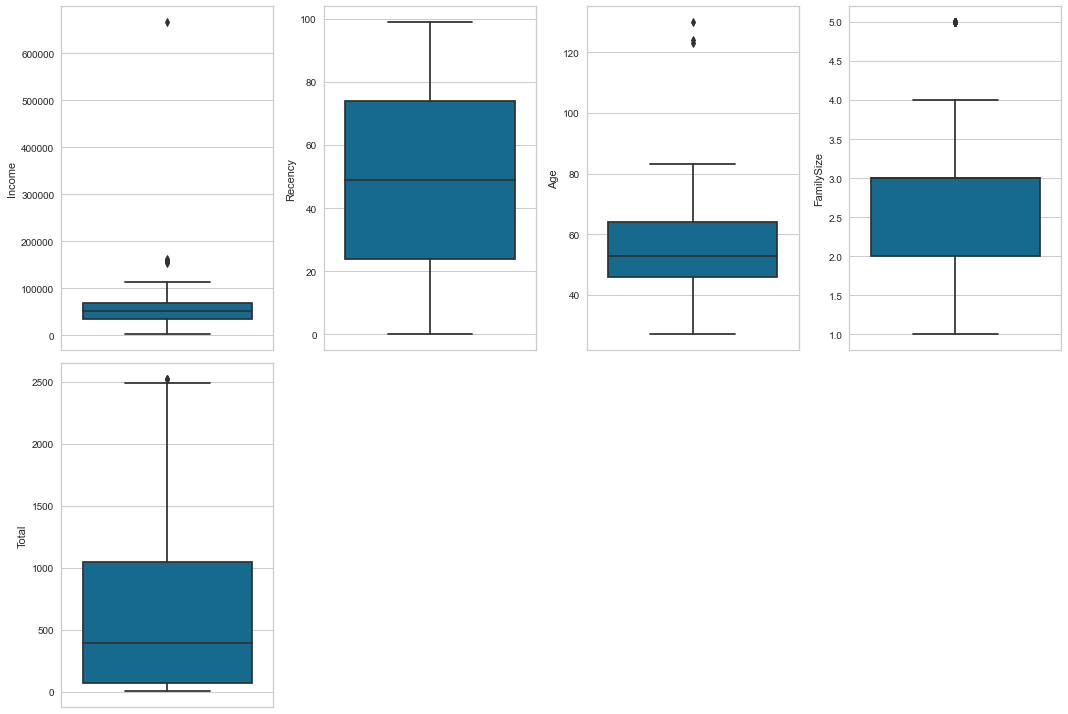

In [207]:
plt.figure(figsize=(15,20))
for i,x in enumerate(df_arr,1):
       plt.subplot(4,4,i)
       sns.boxplot(data=df, y=x)
       plt.tight_layout()
       plt.plot()

In [208]:
before = len(df)

We can see that there are few outliers. <br> <br>
Then, we will remove these outliers


In [209]:
for x in ["Income", "Age", "FamilySize", "Total"]:
    l, u = FindLowerUpper(x)
    df = df[df[x] < u]
after = len(df)

In [210]:
print(f"Number of removed outliers: {before - after} over {before}")

Number of removed outliers: 45 over 2216


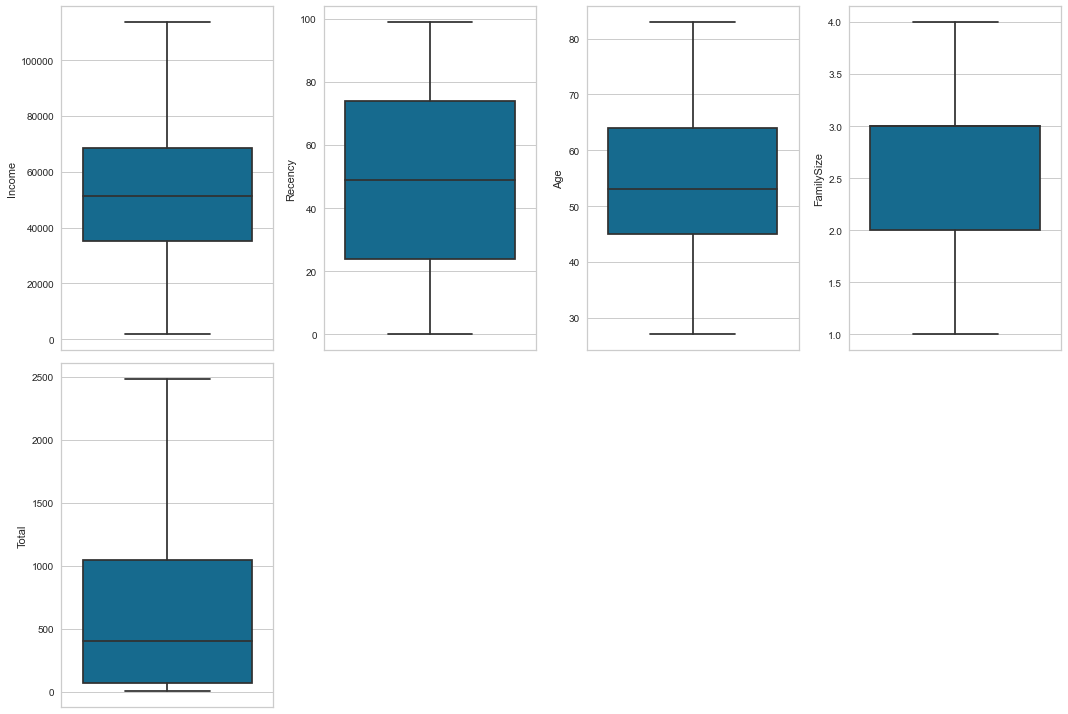

In [211]:
plt.figure(figsize=(15,20))
for i,x in enumerate(df_arr,1):
       plt.subplot(4,4,i)
       sns.boxplot(data=df, y=x)
       plt.tight_layout()
       plt.plot()

Then, drop all the unuse column:


In [212]:
df = df.drop(["Dt_Customer", "Year_Birth", "Kidhome", "Teenhome", "ID"], axis=1)

Text(0.5, 1.0, 'Correlation plot Between Features')

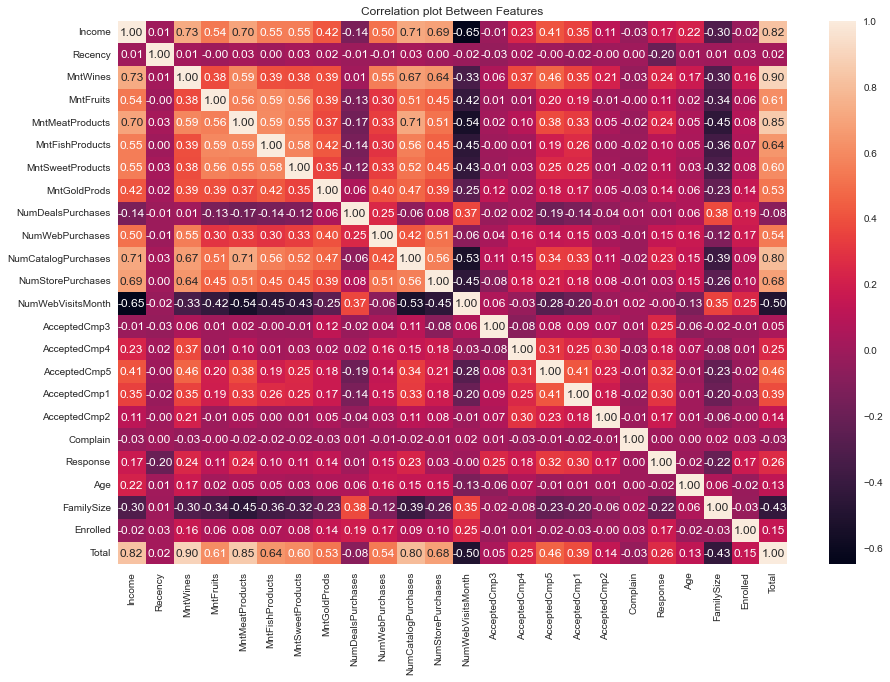

In [213]:
corr = df[['Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response',
       'Age', 'FamilySize', 'Enrolled', 'Total']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, fmt=".2f")
plt.title("Correlation plot Between Features")

This is quite clean, so we will export it for visualization dashboard


In [214]:
#df.to_csv("clean.csv")

## Preprocessing


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2171 non-null   object 
 1   Marital_Status       2171 non-null   object 
 2   Income               2171 non-null   float64
 3   Recency              2171 non-null   int64  
 4   MntWines             2171 non-null   int64  
 5   MntFruits            2171 non-null   int64  
 6   MntMeatProducts      2171 non-null   int64  
 7   MntFishProducts      2171 non-null   int64  
 8   MntSweetProducts     2171 non-null   int64  
 9   MntGoldProds         2171 non-null   int64  
 10  NumDealsPurchases    2171 non-null   int64  
 11  NumWebPurchases      2171 non-null   int64  
 12  NumCatalogPurchases  2171 non-null   int64  
 13  NumStorePurchases    2171 non-null   int64  
 14  NumWebVisitsMonth    2171 non-null   int64  
 15  AcceptedCmp3         2171 non-null   i

Let's convert string to numerical for "Education" and "Marital_Status" columns


In [216]:
encoder = LabelEncoder()
for i in ["Education","Marital_Status"]:
    df[i]=df[[i]].apply(encoder.fit_transform)

In [217]:
for i in df.columns:
    print(df[i].value_counts())

0    1096
1     825
2     250
Name: Education, dtype: int64
1    1390
0     781
Name: Marital_Status, dtype: int64
7500.0     12
35860.0     4
47025.0     3
80134.0     3
18690.0     3
           ..
51124.0     1
74250.0     1
40760.0     1
41452.0     1
52869.0     1
Name: Income, Length: 1934, dtype: int64
56    35
30    32
54    32
46    31
92    30
      ..
41    15
59    14
22    13
7     12
44    11
Name: Recency, Length: 100, dtype: int64
2       40
5       37
6       37
1       35
4       32
        ..
889      1
1308     1
374      1
351      1
428      1
Name: MntWines, Length: 768, dtype: int64
0      380
1      150
2      118
3      110
4      101
      ... 
130      1
164      1
189      1
101      1
144      1
Name: MntFruits, Length: 158, dtype: int64
7      52
11     48
5      45
8      42
6      42
       ..
234     1
740     1
540     1
407     1
182     1
Name: MntMeatProducts, Length: 549, dtype: int64
0      369
2      144
3      126
4      107
6       79
      ...

In [218]:
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df = df.drop(cols_del, axis=1)

## Modeling


There are 18 columns currently in the DataFrame. So, for easier to cluster and visualize, we should use PCA to lower the dimension.


In [219]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )

pca = PCA(n_components=3)
pca.fit(scaled_df)
pca_df = pd.DataFrame(pca.transform(scaled_df), columns=(["1","2", "3"]))

df["pca1"] = pca_df["1"]
df["pca2"] = pca_df["2"]
df["pca3"] = pca_df["3"]

Let's see a little bit about the dataset:


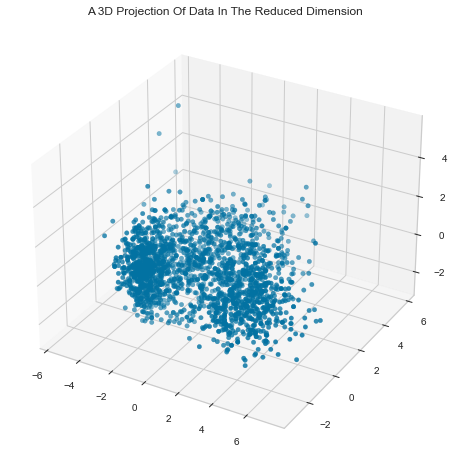

In [220]:
x = pca_df["1"]
y = pca_df["2"]
z = pca_df["3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z)
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

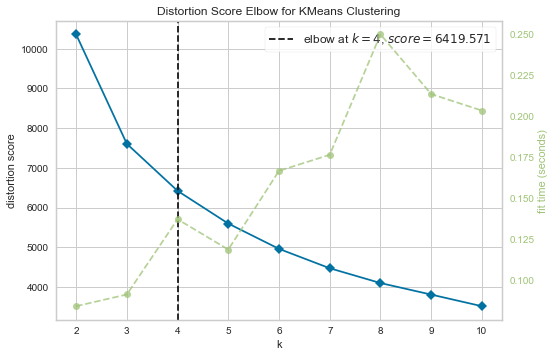

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [221]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_df)
Elbow_M.show()

For the given data, we conclude that the optimal number of clusters for the data is 4.


In [222]:
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(pca_df)
df["Clusters"] = yhat_AC

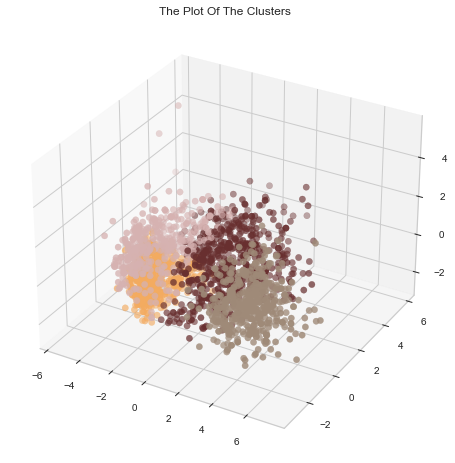

In [223]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

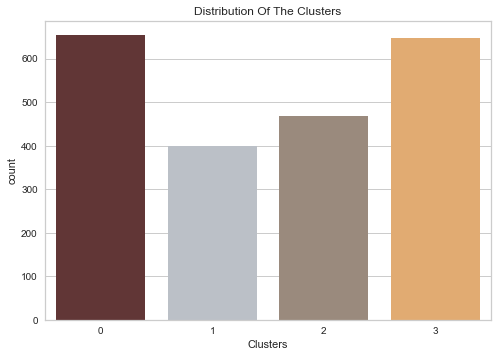

In [224]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

This distribution still seems a bit not fair because group 3 got few data points, but it still acceptable


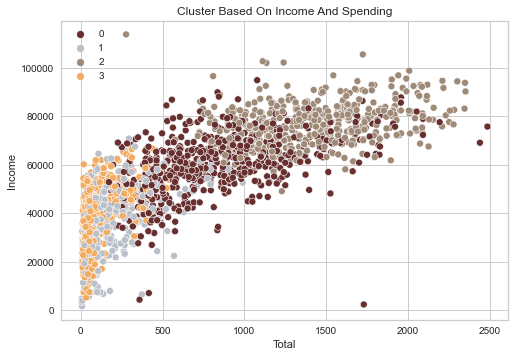

In [225]:
pl = sns.scatterplot(data = df,x=df["Total"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster Based On Income And Spending")
plt.legend()
plt.show()

From this scatter plot, we can divide this group into: <br> <br>
group 0: high spending & average income <br>
group 1: high spending & high income<br>
group 2: low spending & low income<br>
group 3: high spending & low income<br>


### Let's using another clustering method: K means

In [226]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

y_pred = kmeans.fit_predict(pca_df)
df["Clusters_KMeans"] = y_pred

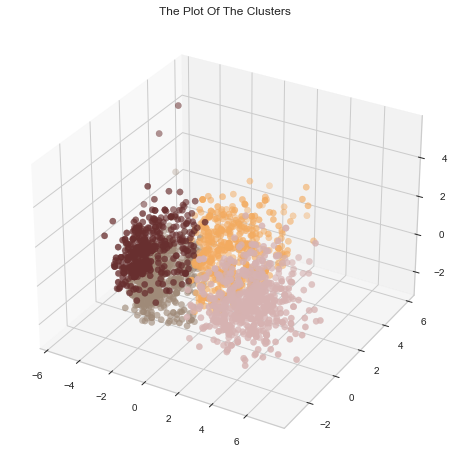

In [227]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df["Clusters_KMeans"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

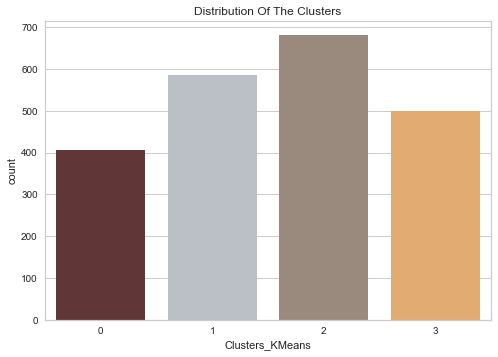

In [228]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters_KMeans"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

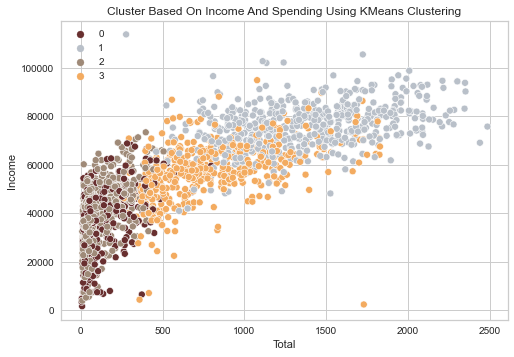

In [229]:
pl = sns.scatterplot(data = df,x=df["Total"], y=df["Income"],hue=df["Clusters_KMeans"], palette= pal)
pl.set_title("Cluster Based On Income And Spending Using KMeans Clustering")
plt.legend()
plt.show()

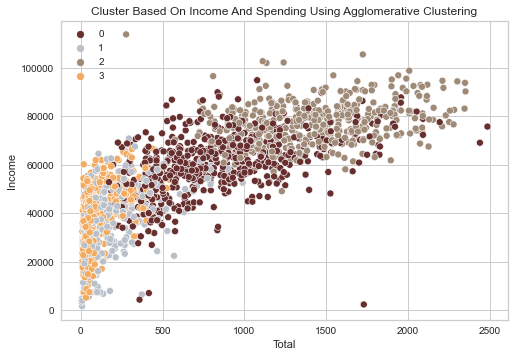

In [230]:
pl = sns.scatterplot(data = df,x=df["Total"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster Based On Income And Spending Using Agglomerative Clustering")
plt.legend()
plt.show()

## Evaluating

From those 2 above plots, it is clear that Agglomerative Clustering did a great job, more precisely than KMean Clustering. 

In KMeans Clustering, it can be seen that group 0 and group 2 are mixed while in Agglomerative Clustering, those 4 groups are more seperately. 